# Clustering Homework
- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 

In [20]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

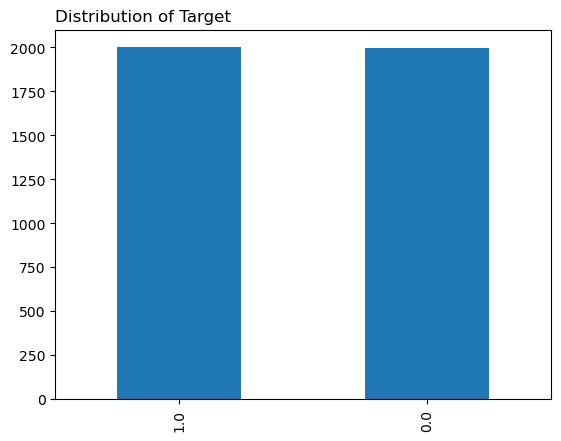

In [23]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

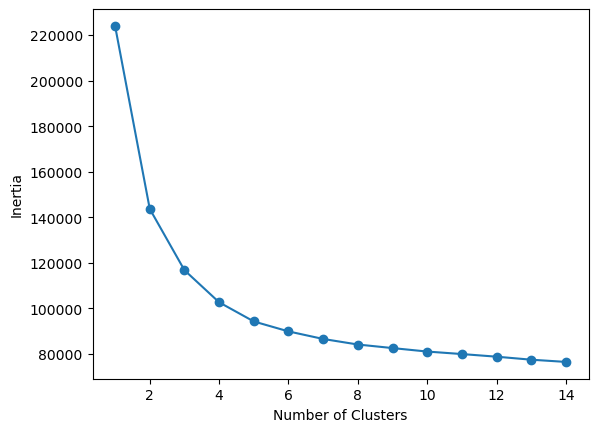

In [25]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Convert categorical variables to one-hot encoding
X = pd.get_dummies(df.drop("target", axis=1))

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

distortions = list()

for i in range(1, 15):
    km = KMeans(n_clusters=i, random_state=0, n_init=10)
    km = km.fit(X_scaled)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

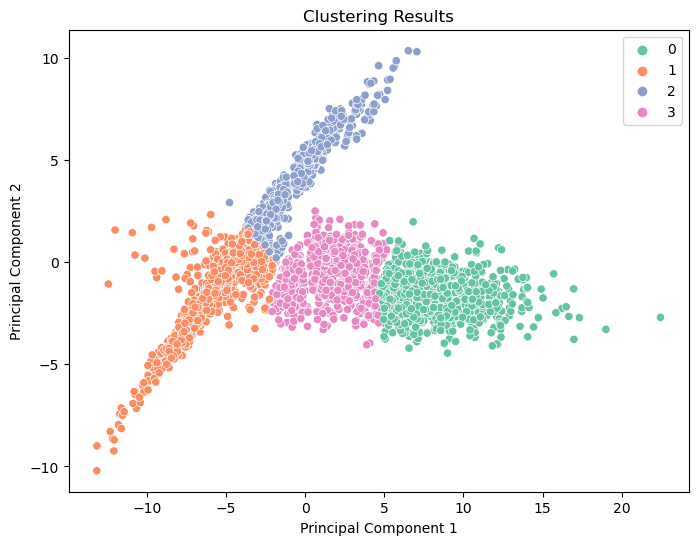

In [28]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Get the cluster labels for each data point
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# Plot the clusters using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='Set2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')
plt.show()

* Based on the plot, we can see that the elbow point is at around 4 clusters.

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [35]:
num_var = ['var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var24', 'var25', 'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var32', 'var33', 'var34', 'var35', 'var36', 'var37', 'var38', 'var39', 'var40', 'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48', 'var49']

cat_var = ['var0', 'var1', 'var2']

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_var),
        ('cat', categorical_transformer, cat_var)
    ])

# Create a logistic regression model
logreg = LogisticRegression()

# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', logreg)])

# Define the hyperparameter grid for grid search
param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its performance on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
print(y_pred_proba)

[9.79116236e-01 9.92606538e-01 8.31766780e-02 9.97897158e-01
 1.22741930e-01 5.43175950e-02 9.99793658e-01 8.58343800e-02
 9.51629141e-01 8.94165922e-01 2.30465650e-02 9.99469352e-01
 2.21637666e-02 9.99549479e-01 1.93497564e-02 1.76105117e-01
 9.97842211e-01 1.44931002e-03 2.50722963e-02 9.99985068e-01
 9.62650245e-01 2.88055486e-01 8.49584555e-02 1.03882692e-01
 3.81224696e-02 1.48092229e-01 9.99999790e-01 9.93764554e-01
 9.91829668e-01 9.73096547e-01 1.04287544e-02 1.07534949e-01
 4.01733146e-01 3.25116662e-02 1.57085921e-01 1.48368480e-02
 9.99997917e-01 7.73219758e-02 9.99999319e-01 9.44245495e-01
 9.99886440e-01 5.49921966e-01 8.37466255e-02 8.10467894e-02
 1.23941978e-01 4.84293956e-02 5.60490143e-02 9.99947835e-01
 4.36010890e-01 1.16531387e-01 6.50942171e-02 9.43667388e-01
 9.99849511e-01 9.75411997e-01 1.52562800e-01 2.14015060e-01
 3.92961236e-02 1.43526948e-01 9.98187868e-01 1.70164032e-01
 1.40240502e-01 9.90538572e-01 9.43316344e-01 4.11217126e-01
 9.99804959e-01 9.973220

In [44]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('roc_auc: ', roc_auc)

accuracy:  0.93
precision:  0.9943502824858758
recall:  0.8669950738916257
roc_auc:  0.9368107824260459


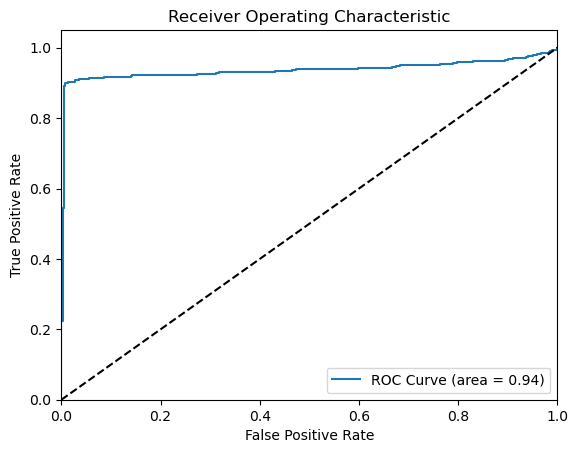

In [45]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

* Based on the provided evaluation metrics, the logistic regression model demonstrates good performance.

* The accuracy of 0.93 indicates that the model correctly predicts 93% of the instances in the test set.

* The precision of 0.994 suggests that when the model predicts a positive outcome, it is correct 99.4% of the time. This indicates a high level of precision in identifying the positive class.

* The recall of 0.867 indicates that the model correctly identifies 86.7% of the actual positive instances in the test set. This implies that the model has a reasonable ability to capture positive cases.

* The ROC AUC score of 0.937 indicates a good overall performance of the model in distinguishing between positive and negative instances. It suggests that the model has a high probability of ranking a randomly chosen positive instance higher than a randomly chosen negative instance.

* In conclusion, the logistic regression model shows strong performance in terms of accuracy, precision, recall, and ROC AUC. However, the model's performance should also be assessed within the specific context and requirements of the problem at hand to determine its practical usefulness.

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [46]:
# Create a pipeline with PCA and logistic regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', PCA()),
                           ('classifier', LogisticRegression())])

# Define the hyperparameter grid for grid search
param_grid = {
    'pca__n_components': [2, 5, 10],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its performance on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [47]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

Accuracy: 0.93
Precision: 0.9915730337078652
Recall: 0.8694581280788177
ROC AUC: 0.9330224300467606


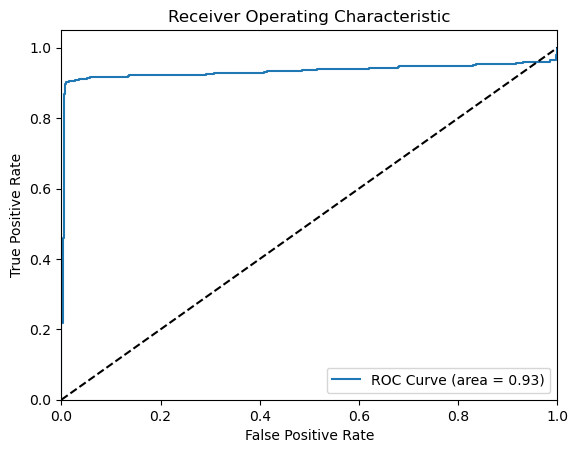

In [48]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


* In terms of accuracy, both models achieve the same performance with a score of 0.93. This indicates that both models correctly predict 93% of the instances in the test set.

* Regarding precision, the model with PCA achieves a slightly lower precision of 0.9916 compared to 0.9944 for the model without PCA. Precision measures the percentage of correctly predicted positive instances out of all instances predicted as positive. Therefore, the model without PCA has a slightly higher precision in identifying positive cases.

* In terms of recall, the model with PCA achieves a recall of 0.8695, while the model without PCA has a recall of 0.8670. Recall measures the percentage of correctly identified positive instances out of all actual positive instances. Both models show similar performance in capturing positive cases.

* For ROC AUC, the model without PCA achieves a slightly higher score of 0.9368 compared to 0.9330 for the model with PCA. ROC AUC measures the model's ability to rank a randomly chosen positive instance higher than a randomly chosen negative instance. Therefore, the model without PCA has a slightly better ability to distinguish between positive and negative instances.

* Overall, both models demonstrate good performance with high accuracy and reasonable precision and recall. However, the model without PCA shows slightly better results in terms of precision and ROC AUC. The choice between using PCA or not depends on the specific requirements of the problem and the trade-off between model complexity and performance.

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var24', 'var25', 'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var32']),
        ('cat', OneHotEncoder(), ['var0', 'var1', 'var2'])
    ])

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans()),
    ('classifier', LogisticRegression())
])

# Define the parameter grid
param_grid = {
    'kmeans__n_clusters': [3, 4, 5],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10]
}


In [74]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its performance on the test set
best_model = grid_search.best_estimator_
print(best_model)
predicted_probabilities = best_model.predict_proba(X_test)
predicted_labels = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, predicted_labels)

# Calculate precision
precision = precision_score(y_test, predicted_labels)

# Calculate recall
recall = recall_score(y_test, predicted_labels)

# Calculate predicted probabilities for positive class
positive_probs = predicted_probabilities[:, 1]

print("Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['var3', 'var4', 'var5',
                                                   'var6', 'var7', 'var8',
                                                   'var9', 'var10', 'var11',
                                                   'var12', 'var13', 'var14',
                                                   'var15', 'var16', 'var17',
                                                   'var18', 'var19', 'var20',
                                                   'var21', 'var22', 'var23',
                                                   'var24', 'var25', 'var26',
                                                   'var27', 'var28', 'var29',
                                                   'var30', 'var31', 'var32']),
                                                 ('cat', OneHotEncoder(),
                                           

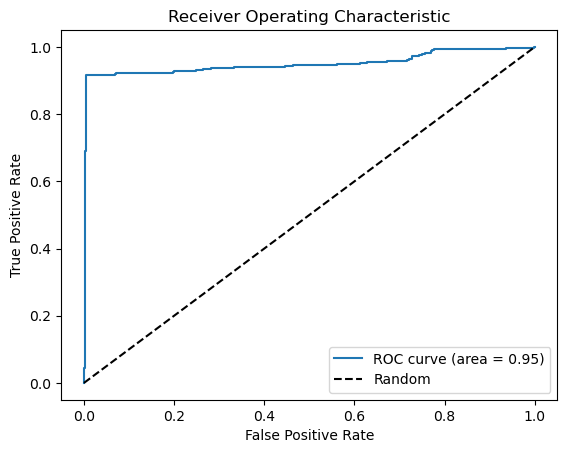

In [75]:
# Calculate false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, positive_probs)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, positive_probs)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

* The model achieved an accuracy of 94.625%, indicating that it correctly classified 94.625% of the instances in the test set. The precision of the model is 99.455%, meaning that when it predicted a positive outcome, it was correct 99.455% of the time. The recall (also known as sensitivity or true positive rate) is 89.901%, suggesting that the model correctly identified 89.901% of the actual positive instances. The area under the ROC curve is 0.95, which indicates that the model's ability to distinguish between positive and negative classes is very good.

* Overall, the model demonstrates high accuracy, precision, recall, and a strong performance according to the ROC curve. This suggests that the model is effective in predicting the target variable and has good discriminatory power.

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

* Based on questions from 2-4, I would recommend the question 4 which uses logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step. The best model from involves 5 clustures.

In [82]:
# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var24', 'var25', 'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var32']),
        ('cat', OneHotEncoder(), ['var0', 'var1', 'var2'])
    ])

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans()),
    ('classifier', LogisticRegression())
])

# Define the parameter grid
param_grid = {
    'kmeans__n_clusters': [5],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [10]
}


In [83]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its performance on the test set
best_model = grid_search.best_estimator_
print(best_model)
predicted_probabilities = best_model.predict_proba(X_test)
predicted_labels = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, predicted_labels)

# Calculate precision
precision = precision_score(y_test, predicted_labels)

# Calculate recall
recall = recall_score(y_test, predicted_labels)

# Calculate predicted probabilities for positive class
positive_probs = predicted_probabilities[:, 1]

print("Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['var3', 'var4', 'var5',
                                                   'var6', 'var7', 'var8',
                                                   'var9', 'var10', 'var11',
                                                   'var12', 'var13', 'var14',
                                                   'var15', 'var16', 'var17',
                                                   'var18', 'var19', 'var20',
                                                   'var21', 'var22', 'var23',
                                                   'var24', 'var25', 'var26',
                                                   'var27', 'var28', 'var29',
                                                   'var30', 'var31', 'var32']),
                                                 ('cat', OneHotEncoder(),
                                           

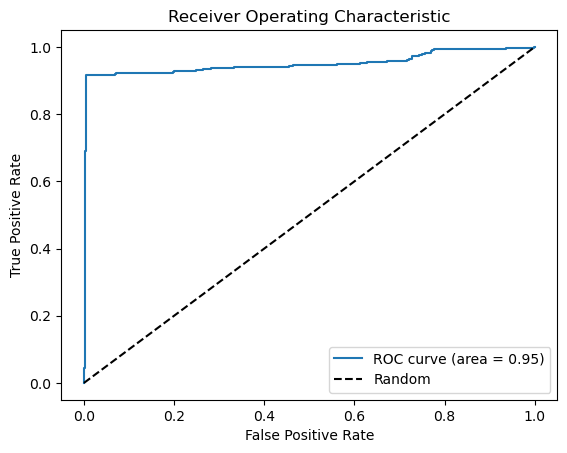

In [84]:
# Calculate false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, positive_probs)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, positive_probs)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()